<a href="https://colab.research.google.com/github/kolattukudy/jupyternotebooks/blob/master/kollective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from tqdm import tqdm
import csv
import random
import string
from datetime import datetime
import time


  •	t : timestamp		(the time of the transfer)
	•	type : [origin|peer]	(whether the transfer was from a peer or from origin)
	•	size: int4		(the size, in bytes, of the downloaded content)
	•	duration : int4	(the duration in milliseconds that it took for the transfer to complete)
	•	source_id: string	(for peer transfers, a UUID for the peer/coworker.  Null for origin transfers)
	•	dest_id: string	(a UUID for the viewer who is downloading the video stream)



 

In [ ]:
import typing as tp
import numpy

class Transfer:
    def __init__(
        self,
        t: tp.Optional[int] = None,
        type: tp.Optional[str]  = None,
        source_id: tp.Optional[str] = None,
        size: int = 1,
        duration: tp.Optional[int] = None,
        dest_id: tp.Optional[str] = None,
    ):
        self.t = t
        self.type= type
        self.source_id = source_id
        self.size = size
        self.duration = duration
        self.dest_id = dest_id

    def to_dict(self) -> dict:
        return {
            "t" : self.t,
            "type": self.type,

            "source_id": self.source_id,
            "size":self.size,
            "duration": self.duration,
            "dest_id": self.dest_id,
        }
def get_time_list(period):
  datelist = pd.date_range(datetime.today(), periods=period).tolist()
  #datelist
  time_list=[]
  for t in datelist:
    
    time_list.append(int(round(t.timestamp()*1000)))
  return time_list

def get_tranfer_df(no_records,percentage_peer, no_src_id):

  transfers = tqdm([Transfer() for i in range(no_records)] )
  transfers_list =[]
  p=[percentage_peer, (100- percentage_peer)]
  p[:] = [x / 100 for x in p]

  nums = numpy.random.choice([0, 1], size=no_records, p=p)
  no_src_id =2
  src_ids=numpy.random.choice(no_records, no_src_id, replace=True)
  for idx,t in enumerate(transfers):
    type_val = 'peer' if nums[idx] == 0 else 'origin'

    source_id = random.choice(src_ids)if type_val=='peer'  else ''

    if type_val == 'peer':
      t.duration = random.randrange(0.5*100, 1*100, 2)
    else:
      t.duration = random.randrange(3*100, 4*100, 2)

    time_list= get_time_list(no_records)
  
    t.t = random.choice(time_list)
    t.type = type_val
    dest_ids=numpy.random.choice(no_records, no_src_id, replace=True)

    t.dest_id = random.choice(dest_ids)
    t.size = random.randrange(1*1024, 10*1024, 2)
    t.source_id = source_id
    transfers_list.append(t)

  transfer_dicts = [transfer.to_dict() for transfer in transfers_list]
  df = pd.DataFrame(transfer_dicts)
  return df

df = get_tranfer_df(10,80, 5)
df.head(10)


100%|██████████| 10/10 [00:00<00:00, 837.20it/s]


,t,type,source_id,size,duration,dest_id
0,1626552349958,peer,7,6944,60,7
1,1626984349960,peer,7,4092,82,4
2,1626638749961,origin,,6168,310,4
3,1626897949962,peer,7,9730,82,3
4,1626465949963,peer,3,7366,66,9
5,1626897949964,peer,7,6514,84,9
6,1626811549966,origin,,4822,374,7
7,1626552349966,peer,3,4294,62,6
8,1626379549967,peer,7,7608,94,2
9,1626552349968,origin,,2116,368,8


In [ ]:
from google.colab import files

df.to_csv('transfer.csv')
files.download('transfer.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df['percentage'] = (df[df['type']== 'peer']['size'] / df['size'].sum()) * 100
df.head(5)

,t,type,source_id,size,duration,dest_id,percentage
0,1626552349958,peer,7,6944,60,7,11.640460
1,1626984349960,peer,7,4092,82,4,6.859557
2,1626638749961,origin,,6168,310,4,NaN
3,1626897949962,peer,7,9730,82,3,16.310725
4,1626465949963,peer,3,7366,66,9,12.347873


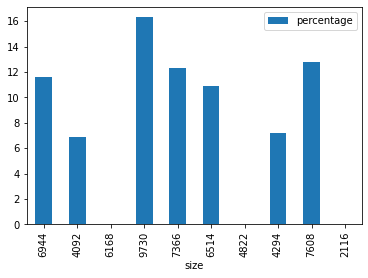

In [ ]:
#How much bandwidth was saved for the customer?  (peer bytes / total bytes)

df.plot(kind='bar', x='size', y='percentage');


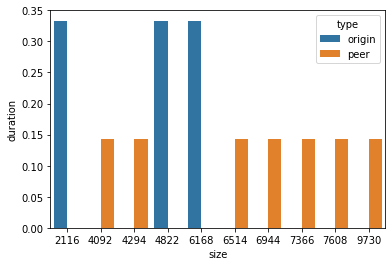

In [ ]:
#How did transfer durations between peer and origin compare?
import pandas as pd
import seaborn as sns


x, y, hue = "size", "duration", "type"
hue_order = ["peer", "origin"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue));

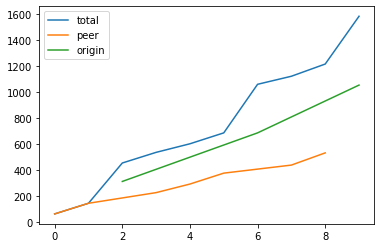

In [ ]:
#How much bandwidth was consumed over time (Mbps)?
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df['duration'].cumsum().plot( kind="line")
df[df['type']== 'peer']['duration'].cumsum().plot(kind="line")
df[df['type']== 'origin']['duration'].cumsum().plot(kind='line')
ax.legend(["total", "peer","origin"]);

**SQL**

In [ ]:


CREATE DATABASE kollective;

CREATE TABLE transfer (
    t  TIMESTAMP,
    type char(6)  NOT NULL,
    size int(100)  NOT NULL,
    duration int(100)  NOT NULL,
    source_id char(20),
    dest_id  char(20) NOT NULL,
    PRIMARY KEY  (dest_id)
);


CREATE INDEX idx_transfer
ON transfer (t, duration);

In [ ]:
	#2.	How might you get your dataset from python into SQL?
   
  # use df.to_sql(connection to databse)

  #or 

  # save the dataframe as csv and load csv to sql.


In [ ]:
	#3.	Create a schema for a second table called node.  
CREATE TABLE node (
    id char(20)  NOT NULL,
    name char(128)  NOT NULL,
    office char(128)  NOT NULL,
    
    PRIMARY KEY  (id)
);


In [ ]:
#	4.	Write a query that shows how many bytes one employee downloaded from 
# another.  e.g.:

#a.	Bob downloaded 100MB from Carol
#b.	Bob downloaded 80MB from Joe

select
v.name as viewer_name,
t.size,
h.name as host_name
from transfer t
join node as h on t.dest_id = h.id
join node as v on t.source_id = v.id;



In [ ]:
#5.	Write a query that shows who downloaded bytes from someone in another office, e.g.:
#a.	Bob (Boston HQ) downloaded bytes from Carol (Chicago Branch)

select
v.name as viewer_name,v.office as viewer_office,
t.size,
h.name as host_name,h.office as host_office
from transfer t
join node as h on t.dest_id = h.id
join node as v on t.source_id = v.id;

